In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
provincias = gpd.read_file("provincia.json")
provincias.head()

,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,1,0.0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,"MULTIPOLYGON (((-58.34189 -34.63110, -58.34240..."
1,2,0.0,Provincia,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"MULTIPOLYGON (((-68.25000 -37.57478, -68.25000..."
2,3,0.0,Provincia,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN,"MULTIPOLYGON (((-66.66179 -31.92054, -66.60454..."
3,4,0.0,Provincia,Provincia de Santa Fe,Provincia,Santa Fe,82,Geografía,IGN,"MULTIPOLYGON (((-58.88082 -28.06682, -58.88360..."
4,5,0.0,Provincia,Provincia de La Rioja,Provincia,La Rioja,46,Geografía,IGN,"MULTIPOLYGON (((-65.42299 -30.11960, -65.49056..."


<AxesSubplot:>

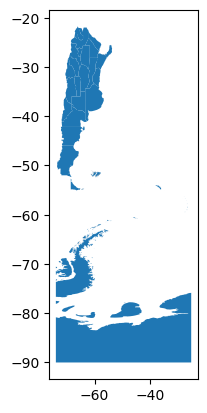

In [3]:
provincias.plot()

In [4]:
departamentos = gpd.read_file("departamento.json")
departamentos.head()

,gid,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,2,Departamento,Departamento Federal,Departamento,Federal,30035,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.57731 -30.69016, -58.57512..."
1,3,Departamento,Departamento Gualeguaychú,Departamento,Gualeguaychú,30056,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.13011 -33.02912, -58.13087..."
2,4,Departamento,Departamento Islas del Ibicuy,Departamento,Islas del Ibicuy,30063,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-58.57589 -34.02675, -58.57593..."
3,5,Departamento,Departamento Victoria,Departamento,Victoria,30105,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-59.77158 -32.58791, -59.77198..."
4,6,Departamento,Departamento Diamante,Departamento,Diamante,30021,ATER - Direc. de Catastro,IGN,"MULTIPOLYGON (((-60.25784 -32.05170, -60.25723..."


In [7]:
departamentos['provincia'] = departamentos['in1'].str[:2] 


df2 = departamentos[departamentos['provincia'].isin(['06','14','82'])]
df2.head()

,gid,objeto,fna,gna,nam,in1,fdc,sag,geometry,provincia
7,9,Departamento,Partido de Saladillo,Partido,Saladillo,06707,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-59.18145 -35.75551, -59.18139...",06
8,10,Departamento,Partido de Las Flores,Partido,Las Flores,06455,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.70753 -36.01728, -58.70772...",06
9,11,Departamento,Partido de Rojas,Partido,Rojas,06686,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-60.49639 -34.17646, -60.49634...",06
10,12,Departamento,Partido de Escobar,Partido,Escobar,06252,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.71215 -34.24890, -58.69112...",06
11,13,Departamento,Partido de José C. Paz,Partido,José C. Paz,06412,ARBA - Gerencia de Servicios Catastrales,IGN,"MULTIPOLYGON (((-58.78454 -34.47607, -58.78316...",06


<AxesSubplot:>

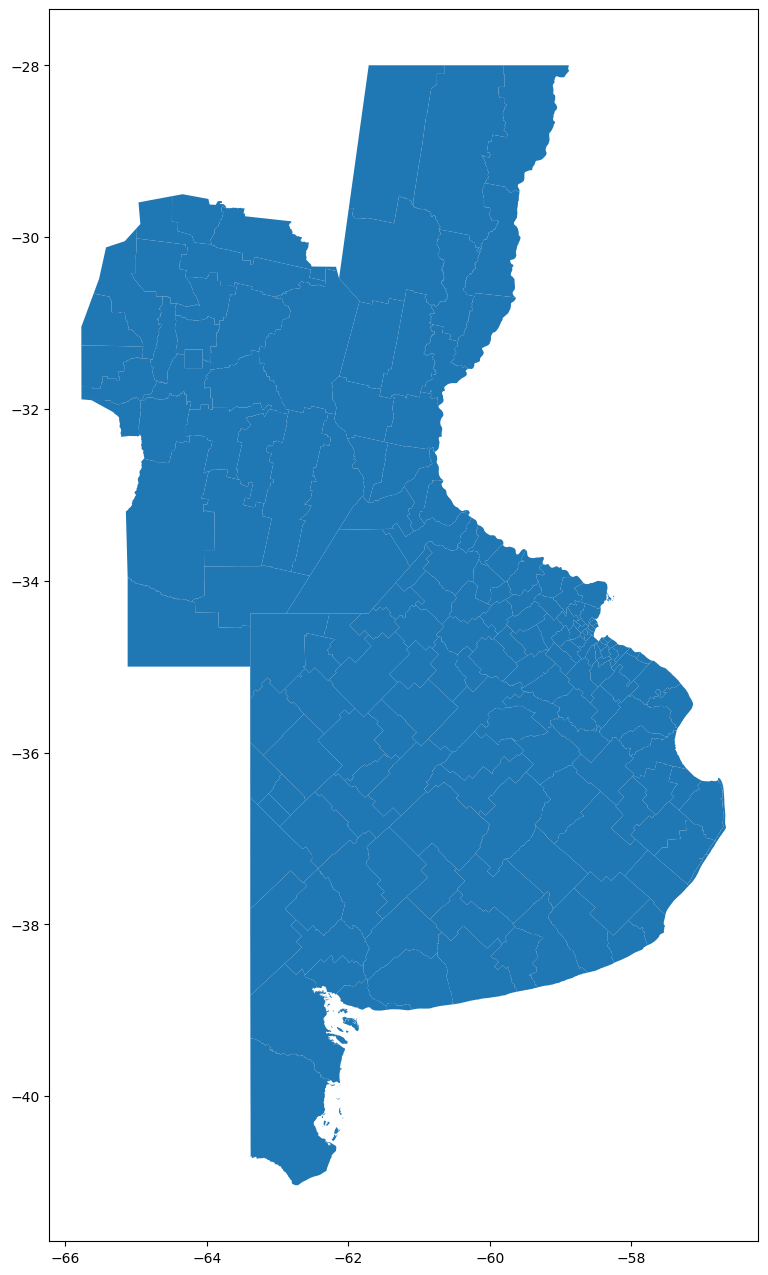

In [9]:
fig, ax = plt.subplots(1, figsize=(15,16))


df2.plot(ax=ax)

In [17]:
limites = gpd.read_file("linea_de_limite_070111.json")

limites2=limites[limites['gna'].isin(['Buenos Aires - Santa Fe','Buenos Aires - Córdoba','Córdoba - Santa Fe'])]
limites2

,gid,entidad,objeto,fna,nam,gna,vlj,fdc,sag,geometry
32,169,10.0,Límite Interprovincial,Buenos Aires - Santa Fe Tramo 05,Tramo 05,Buenos Aires - Santa Fe,1.0,Arbitraje Corte Suprema de Just. (SFe-Cor-BA) ...,IGN,"MULTILINESTRING ((-61.71760 -34.38361, -61.648..."
38,157,10.0,Límite Interprovincial,Buenos Aires - Santa Fe Tramo 02,Tramo 02,Buenos Aires - Santa Fe,1.0,Arbitraje Corte Suprema de Just. (SFe-Cor-BA) ...,IGN,"MULTILINESTRING ((-60.28912 -33.32136, -60.289..."
41,167,10.0,Límite Interprovincial,Buenos Aires - Santa Fe Tramo 03,Tramo 03,Buenos Aires - Santa Fe,1.0,Arbitraje Corte Suprema de Just. (SFe-Cor-BA) ...,IGN,"MULTILINESTRING ((-60.33039 -33.39448, -60.329..."
42,168,10.0,Límite Interprovincial,Buenos Aires - Santa Fe Tramo 04,Tramo 04,Buenos Aires - Santa Fe,1.0,Arbitraje Corte Suprema de Just. (SFe-Cor-BA) ...,IGN,"MULTILINESTRING ((-60.93212 -33.65292, -60.930..."
54,182,10.0,Límite Interprovincial,Buenos Aires - Santa Fe Tramo 01,Tramo 01,Buenos Aires - Santa Fe,1.0,Arbitraje Corte Suprema de Just. (SFe-Cor-BA) ...,IGN,"MULTILINESTRING ((-60.26844 -33.28458, -60.268..."
105,234,10.0,Límite Interprovincial,Córdoba - Santa Fe Tramo 02,Tramo 02,Córdoba - Santa Fe,1.0,C. Supr. de Just. (SFe-Cor-BA) 1882- Ley 18620/70,IGN,"MULTILINESTRING ((-61.90878 -33.11849, -61.906..."
109,246,10.0,Límite Interprovincial,Buenos Aires - Santa Fe Tramo 06,Tramo 06,Buenos Aires - Santa Fe,1.0,Arbitraje Corte Suprema de Just. (SFe-Cor-BA) ...,IGN,"MULTILINESTRING ((-62.87973 -34.38349, -62.535..."
132,286,10.0,Límite Interprovincial,Buenos Aires - Córdoba Tramo 01,Tramo 01,Buenos Aires - Córdoba,1.0,Arbitraje Corte Suprema de Just. (SFe-Cor-BA) ...,IGN,"MULTILINESTRING ((-62.87973 -34.38349, -62.880..."
146,1752,10.0,Límite Interprovincial,Córdoba - Santa Fe Tramo 03,Tramo 03,Córdoba - Santa Fe,1.0,C. Supr. de Just. (SFe-Cor-BA) 1882- Ley 18620/70,IGN,"MULTILINESTRING ((-62.87973 -34.38349, -62.705..."
147,1753,10.0,Límite Interprovincial,Córdoba - Santa Fe Tramo 01,Tramo 01,Córdoba - Santa Fe,1.0,C. Supr. de Just. (SFe-Cor-BA) 1882- Ley 18620/70,IGN,"MULTILINESTRING ((-62.24107 -31.70018, -62.241..."


In [24]:
tren = gpd.read_file("lineas_de_transporte_ferroviario_AN010.json")

from geopandas.tools import sjoin

rutastren = sjoin(tren, df2, how = 'left')

rutastren = rutastren.dropna()

rutastren.head()

,gid_left,entidad,objeto_left,fna_left,gna_left,nam_left,fun,rgc,ltn,loc,...,index_right,gid_right,objeto_right,fna_right,gna_right,nam_right,in1,fdc_right,sag_right,provincia
1,614,0,Ferrocarril,Ferrocarril Nacional General Belgrano,Ferrocarril Nacional,General Belgrano,6.0,2.0,1.0,44.0,...,238.0,212.0,Departamento,Departamento Capital,Departamento,Capital,14014,IDE Cordoba,IGN,14
5,6,0,Ferrocarril,Ferrocarril Nacional General Roca,Ferrocarril Nacional,General Roca,2.0,1.0,1.0,44.0,...,431.0,377.0,Departamento,Partido de Coronel de Marina Leonardo Rosales,Partido,Coronel de Marina Leonardo Rosales,06182,ARBA - Gerencia de Servicios Catastrales,IGN,06
6,7,0,Ferrocarril,Ferrocarril Nacional General Roca Ramal R60,Ferrocarril Nacional,General Roca Ramal R60,6.0,1.0,1.0,44.0,...,125.0,107.0,Departamento,Partido de Villarino,Partido,Villarino,06875,ARBA - Gerencia de Servicios Catastrales,IGN,06
7,8,0,Ferrocarril,Ferrocarril Nacional General Roca,Ferrocarril Nacional,General Roca,6.0,1.0,1.0,44.0,...,431.0,377.0,Departamento,Partido de Coronel de Marina Leonardo Rosales,Partido,Coronel de Marina Leonardo Rosales,06182,ARBA - Gerencia de Servicios Catastrales,IGN,06
8,9,0,Ferrocarril,Ferrocarril Nacional General Roca,Ferrocarril Nacional,General Roca,4.0,1.0,1.0,44.0,...,125.0,107.0,Departamento,Partido de Villarino,Partido,Villarino,06875,ARBA - Gerencia de Servicios Catastrales,IGN,06


<AxesSubplot:>

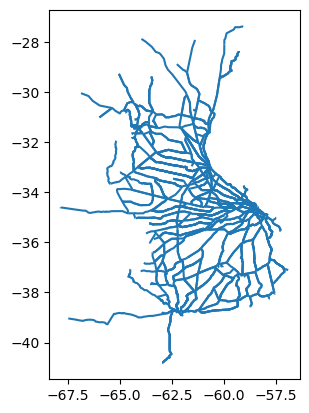

In [25]:
rutastren.plot()

[]

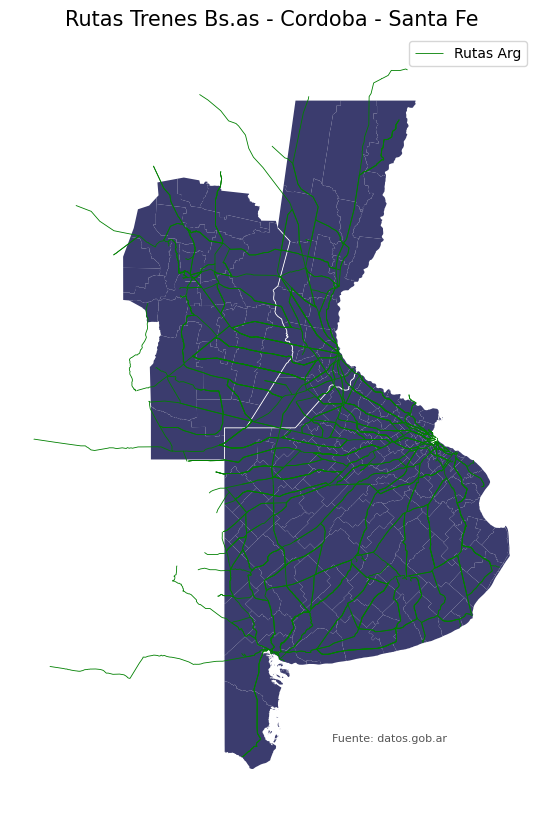

In [60]:
fig, ax = plt.subplots(1, figsize=(10,10))

base = df2.plot(ax=ax, color='#3B3C6E')
limites2.plot(ax=base, color='white',linewidth=0.6)
rutastren.plot(ax=base, color='green',linewidth=0.6, label='Rutas Arg')

ax.set_title('Rutas Trenes Bs.as - Cordoba - Santa Fe', fontdict={'fontsize':'15', 'fontweight':'3'})

ax.axis('off')

ax.annotate('Fuente: datos.gob.ar', xy=(0.39,0.10), xycoords='figure fraction', horizontalalignment='center'
            ,verticalalignment='top', fontsize=8, color='#555555')

plt.legend(loc='upper right')

plt.plot()

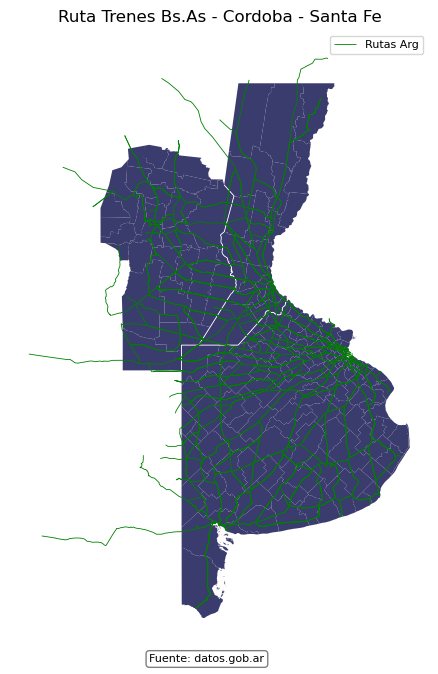

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(10,8))

base = df2.plot(ax=ax, color='#3B3C6E')
limites2.plot(ax=base, color='white', marker="*", markersize=20, linewidth=0.6)
rutastren.plot(ax=base, color='green', marker="*", markersize=10, linewidth=0.6, label='Rutas Arg')

ax.set_title('Ruta Trenes Bs.As - Cordoba - Santa Fe', fontdict={'fontsize': '12', 'fontweight': '3'})
ax.axis('off')

# add the legend and the source text
plt.legend(loc='upper right', fontsize=8)

source_text = 'Fuente: datos.gob.ar'

bbox_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
source_box = plt.text(0.5, 0.1, source_text, transform=fig.transFigure, fontsize=8,
                      verticalalignment='top', horizontalalignment='center', bbox=bbox_props)

plt.box(on=None)

plt.show()